In [66]:
import os

import numpy as np
import pandas as pd
import requests
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications import inception_v3

from matplotlib import pyplot as plt
from PIL import Image

In [12]:
CURRDIR = os.getcwd()
DATADIR = os.path.join(CURRDIR, "..", "data")
IMAGEDIR = os.path.join(DATADIR, "images")
FILEPATH = os.path.join(DATADIR, "1601111410.csv")

In [3]:
labels = pd.read_csv(FILEPATH)
labels.head()

,Unnamed: 0,score,upvote_ratio,title,age,comments,image,url
0,0,15,0.91,Umm yes.,0,1,https://i.redd.it/e733gbk7cap51.jpg,https://redd.it/izlmed
1,1,1582,0.97,Gateway to the ocean in a small Italian town,0,13,https://i.redd.it/8kqnqvarvap51.jpg,https://redd.it/izjy76
2,2,76,0.99,I found this cool reception while walking in B...,1,0,https://i.redd.it/63oxcgxj79p51.jpg,https://redd.it/izft3i
3,3,27,0.94,My kitchen is starting to come together! Just ...,1,0,https://i.redd.it/sz428uj0s6p51.jpg,https://redd.it/izbpt6
4,4,2934,0.99,Was told you guys might like this picture of a...,1,27,https://i.redd.it/arhv6p1564p51.jpg,https://redd.it/iz3ayc


/home/ssoi/.local/share/virtualenvs/accidentallywes-pq8Q8z27/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Log # of Up Votes')

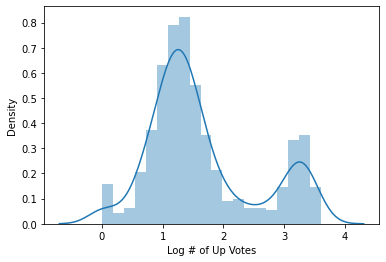

In [4]:
sns.distplot(np.log1p(labels["score"]) / np.log1p(10))
plt.xlabel("Log # of Up Votes")

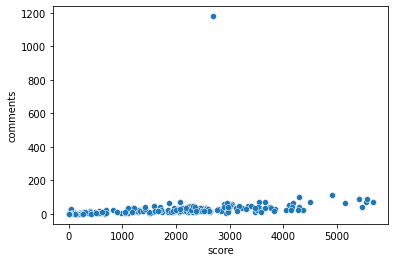

In [5]:
sns.scatterplot(
    x=labels["score"],
    y=labels["comments"],
)

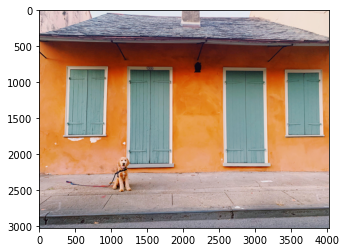

In [17]:
_, filename = os.path.split(labels[labels["comments"] > 1000]["image"].iloc[0])
filepath = os.path.join(IMAGEDIR, filename)
img = Image.open(filepath)
plt.imshow(img)

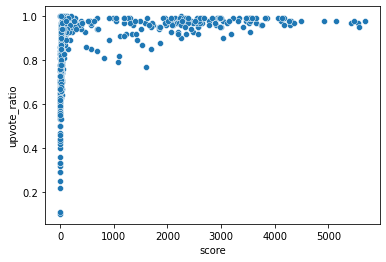

In [26]:
sns.scatterplot(
    x=labels["score"],
    y=labels["upvote_ratio"],
)

In [62]:
_, filename = os.path.split(labels.iloc[labels["score"].sort_values(ascending=False).index[6]]["image"])
filepath = os.path.join(IMAGEDIR, filename)
img = Image.open(filepath)


In [71]:
inception_v3.preprocess_input(np.array(img.resize((512, 512))))

array([[[-1.        , -0.99215686, -0.8901961 ],
        [-0.6156863 , -0.6       , -0.4980392 ],
        [-0.654902  , -0.6392157 , -0.52156866],
        ...,
        [-0.9764706 , -0.96862745, -0.827451  ],
        [-0.8745098 , -0.85882354, -0.7411765 ],
        [-0.88235295, -0.8666667 , -0.7647059 ]],

       [[-0.78039217, -0.7647059 , -0.64705884],
        [-0.8745098 , -0.85882354, -0.7411765 ],
        [-0.8980392 , -0.8901961 , -0.7490196 ],
        ...,
        [-0.96862745, -0.9607843 , -0.81960785],
        [-0.90588236, -0.8901961 , -0.77254903],
        [-0.84313726, -0.827451  , -0.7254902 ]],

       [[-0.8117647 , -0.8039216 , -0.64705884],
        [-0.8745098 , -0.8666667 , -0.70980394],
        [-0.81960785, -0.8117647 , -0.64705884],
        ...,
        [-0.96862745, -0.9607843 , -0.8039216 ],
        [-0.81960785, -0.8039216 , -0.6862745 ],
        [-0.96862745, -0.9529412 , -0.8509804 ]],

       ...,

       [[-0.6       , -0.6627451 , -0.4823529 ],
        [-0

In [72]:
inception_model = inception_v3.InceptionV3(weights="imagenet", include_top=False)

87916544/87910968 [==============================] - 3s 0us/step


In [61]:
labels.iloc[labels["score"].sort_values(ascending=False).index[6]]

Unnamed: 0                                         435
score                                             4915
upvote_ratio                                      0.98
title           The Life Aquatic with Jacques Cousteau
age                                                 79
comments                                           112
image              https://i.redd.it/7ze5e8dlnm951.jpg
url                             https://redd.it/hng7j6
Name: 435, dtype: object